# Basic Probability

> This notebook was created while sitting in the ML class taught by Alison and Colin. Some of the Python codes were written by me but I remember most of them were provided.

For many of you this is probably review and straightforward, but it is useful to review these concepts and make sure that we understand how to implement them in python.  

In [1]:
#Setup the basic inputs that we need for this
import numpy as np
import matplotlib.pyplot as plt
import random
import math
plt.rcParams['font.size'] = '16'

This is a simple function to compute ${ n \choose r}$ that we will use in later experiments.  Later versions of python have a built in ${n \choose r}$ but I put this here in case we need it.

In [2]:
def slownchooser(n,r):
    return (math.factorial(n)/math.factorial(r)/math.factorial(n-r))

### We begin from the simple case of something with two possible outcomes.  

For example: 

1. A coin toss
2. Present or absent
3. Wave arrival or no wave arrival

This is pervasive in almost any part of science, you can find examples where there are two possible outcomes.  The most common is like the above, either the event occurred or it did not.  We will play with the most common, that you are likely to see in a probability textbook: The coin toss.

### Implement a coin-toss function

In [3]:
def cointoss():
    #Returns either 'H' or 'T' to simulate a coin-toss
    flip = random.randint(0, 1)  #chooses a random integer between 0 and 1 
    if flip == 0:
        return 'H'
    else:
        return 'T'

def toss_coin_many_times(n_toss):
    """
    Toss a coin as many times as you want and see whether Python is comparable
    with Julia in terms of speed
    """

    head_count = 0
    tail_count = 0
    for n in range(n_toss):
        outcome = cointoss()
        if outcome == 'H':
            head_count += 1
        elif outcome == 'T':
            tail_count += 1

    print('{:s}{:d}'.format('Number of head is ', head_count))
    print('{:s}{:d}'.format('Number of tail is ', tail_count))
    print('{:s}{:f}'.format('Ratio between head and tail is', head_count / tail_count))


In [4]:
for ii in range(6):
    print(cointoss())

H
T
H
T
H
T


Now let's think about how to combine events like this.  Suppose we want to know how likely it is that we get three tails in a row.  The 'brute-force' way to do this is to just write out all the possibilities and count, so here they are:

1. HHH
2. HHT
3. HTH
4. THH
5. TTH
6. THT
7. HTT
8. TTT

So there are 8 possible outcomes from three coin-flips and only one is all tails so that means the probability of all tails is 1/8, or:
$$
P(3T) = 1/8
$$
More generally, we can estimate the number of possibilities by taking the number of outcomes (here 2) and raising it to the power of the number of tests (here 3), so 
$$
n=2^3=8
$$

We also have a more general way of finding the number of combinations that have a particular outcome.  So the number of combinations of $r$ outcomes in $n$ experiments is:
$$
{n \choose r} = \frac{n!}{r!(n-r)!}
$$



In our case, we asked for the probability of 3 tails in 3 tosses which would mean that we need to know the number of cominations that result in 3 tails so $r=3$ and $n=3$ and thus 
$$
{3 \choose 3} = \frac{3!}{3!0!} = 1
$$

So now we can compute the probability of 3 tails in 3 tosses via:
$$
P(3T)=\frac{\frac{n!}{r!(n-r)!}}{2^n}=\frac{3\choose 3}{2^3}=\frac{1}{8}
$$



Verify the following facts:
1. That you will get 50% heads and 50% tails if you toss enough coins.
2. Make a bar graph of the number of heads that you get in repeats of 3 flips of the coin.  Does it correspond with the distribution above?

In [5]:
n_toss_list = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
for n_toss in n_toss_list:
    toss_coin_many_times(int(n_toss))

Number of head is 5
Number of tail is 5
Ratio between head and tail is1.000000
Number of head is 50
Number of tail is 50
Ratio between head and tail is1.000000
Number of head is 485
Number of tail is 515
Ratio between head and tail is0.941748
Number of head is 4965
Number of tail is 5035
Ratio between head and tail is0.986097
Number of head is 50072
Number of tail is 49928
Ratio between head and tail is1.002884
Number of head is 499840
Number of tail is 500160
Ratio between head and tail is0.999360
Number of head is 4998338
Number of tail is 5001662
Ratio between head and tail is0.999335
Number of head is 50003721
Number of tail is 49996279
Ratio between head and tail is1.000149


### Now that you have things working for these first two examples, re-run the notebook a few times and comment on how things change and what this means. 

## Other important properties of probabilities

1. All probability distributions add up to 1.  So if the probability of some event is $p$, the probability that the event does not happen is $1-p$, which includes all outcomes other than the event in question.  More generally, the probability of any number of _mutually exclusive_ events can be added to find the probability of one or the other occurring.  So if I roll a dice, the probability of rolling a 3 is $1/6$, the probability of rolling either a 3 or a 4 is $1/6+1/6=1/3$.
2. The probability of independent events are multiplied.  So the probability that you roll two tails in a row is $\frac{1}{2}^2=\frac{1}{4}$, more generally, the probability of $n$ successive events with probability $p$ is 
$$ P = (1-p)^n$$
3. The probablity that you will have $n-r$ occurances of the event followed by $r$ occurances of the non-event (e.g. $n-r$ heads followed by $r$ tails is:
$$ P  = (1-p)^{n-r} p^r$$
4. If these events may occur in any order, then there are ${n \choose r}$ ways for this to occur, which gives us:
$$ P = {n \choose r} (1-p)^{n-r} p^r.$$
For our coin-flip experiment, $p=1/2$ so this is:
$$P = { n\choose r} \left(\frac{1}{2} \right)^n,$$
which is our formula above.

# Bayes Theorem

Bayes' theorem tells us how to understand the probability of a given event, given that other events have occurred.  Our book gives a very nice derivation of Bayes' theorem that we will go through here. To begin, we define _conditional probability_.  This is the probability of one thing happening given that another thing has already occurred.  This is a really common circumstance in geophysics because our data do not make direct observations, we try to infer results based no data that are indirect.  So as in the example in the book, we might ask:
1. What is the probability of an eruption, given our observed seismicity near a volcano? 
2. What is the probability that there is mineralization, given our observed magnetic data?
3. What is the probability of a particular mineral being present given the hardness of our sample?

If two events are related, then the joint probability of the two events is not just their product, in other words: 
$$
P(A,B)=P(A and B) \neq P(A) P(B)
$$
The _conditional probability_ is the probability of a second event, given the first
$$
P(A|B) = P(A given B) =P(A \text{ conditioned on } B)
$$
Note that the _conditional probability_ can be either larger or smaller than the independent probability. For example
1. The probability of a volcanic eruption, given that we have observed tremor, is larger than the probability of an eruption on its own, i.e. 
$$
P(eruption|tremor) > P(eruption)
$$
2. The probability of observing a fossil is much smaller if you're in igneous rocks than if you're in 'general' rocks:
$$
P(fossil|igneous) < P(fossil)
$$

This leads us to Bayes' theorem: 
$$
P(A,B) =p(B|A) p(A)
$$
which says that the probability of both $A$ and $B$ occurring is equal to the product of the (independent) probabilities of $A$ occurring and of $B$ occurring given that $A$ has already occurred.  Because they are independent we multiply them together to find the joint probability.  Now there is nothing special in the choice of $A$ and $B$ and so we have that:
$$
P(A,B) = p(B|A)p(A) = p(A|B)p(B)
$$
so that
$$
P(A|B) = \frac{p(B|A)p(A)}{p(B)},
$$
which is Bayes' theorem.

Another good explanation of Bayes' theorem is here: https://towardsdatascience.com/bayes-rule-with-a-simple-and-practical-example-2bce3d0f4ad0 which I took this graphic from.
![image info](Bayes1.png)

## Exercise with Bayes

Following the blog post above, suppose that you want to compute the probability of drilling into a mineralized zone.  So you want to determine:
$$
P(A|B) = P(\text{mineralization given geophysical data anomaly}) = P(min|anom)
$$
Now assume that we know:
1. The probability of mineralization, $P(min)$, from background geological analysis, of 25%, (this is the _prevelance_ of mineralization in our region)
2. Suppose that if there is mineralization, then you will observe an anomaly 95% of the time (this is the _sensitivity_ of our method), this is $P(anom|min)$
3. Suppose that if there is no mineralization, then you will not observe an anomaly say 80% of the time (this is the _specificity_ of the method this is $P(! anom| ! min)$
4. If we have $P(min)$ we have $P(!min)=1-P(min)$ because there either is or is not mineralization in the area.

1. First, write out Bayes' theorem for our problem.
2. How will you compute $P(anom)$?  Write this up in equations.
3. Now implement the Bayes' theorem calculation, so compute the probability of having mineralization if there is an anomaly.


Now we're going to look at the dependence of the result on various factors.  To do that, first let's make a function to do our calculation, following the template below.

In [9]:
def MyBayes(Prev,Sen,Spe):
    #Compute, using Bayes' theorem, the probability of an event given:
    #the sensitivity and specificity of the method and the prevelance of the property
    #Inputs: 
    #Prev: the probability of the event or the prevelance of the event
    #Sen: the sensitivity of the test
    #Spe: the specificity of the test
    
    #outputs: the probability of the specific instance being correct
    
    
    return P_out

## Look at the dependence on the Sensitivity, Specificity and Prevelance

I will leave this open-ended look into it however you think would be informative, and be prepared to share what you find with the group on Friday!  Think about what this means in an Earth science context.

### For our last topic on probability, let's look at continuous random variables

We can start by simply taking our coin-flip example and running it many many times

Text(0, 0.5, 'probability')

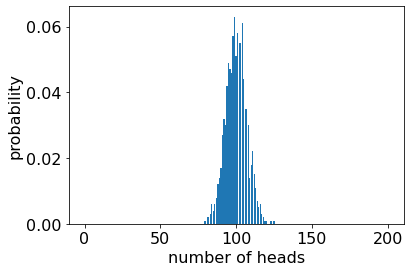

In [13]:
reslist=[]
ntrials=1000
nflips=200
for ii in range(ntrials):
    nh,nt,resstring=cointrials(nflips)
    reslist.append(nh)

x=np.arange(nflips+1)
heights=np.zeros_like(x)
for ii in range(nflips):
    heights[ii]=reslist.count(ii)

plt.bar(x,heights/ntrials)
plt.xlabel('number of heads')
plt.ylabel('probability')

Notice that the bars get quite small because we have so many possible outcomes and that there is a central value, (at about 1/2 the number of flips as expected), with tails surrounding it.  This is the _normal distribution_ and it is the result essentially taking the binomial distribution we looked at before and letting our variable sampling go to zero (i.e. we make our variable into a continuous variable).

Notice also that the actual probability of any one occurance is now very small (only about 7%)!  This is logical because there are so many trials that are close to the mean, but not precisely equal to it.  

#### Calculate the chance of getting within say 10 of 1/2 our number of flips.

### A last few notes:

1. For most of this to apply, we have to assume that the samples are representative of a random distribution.  This is often not the case (e.g. if you analyze core), but often a reasonable approximation.
2. Particularly important for machine learning is to make sure that the samples that you use for training are representative of the underlying distribution that you want to sample.  This is often not trivial.
3. Be on the lookout for hidden correlations between your variables.  This can confound your probability/statistics and make your results look better or worse than they really are.

### Challenge question:
1. Find a paper that uses the material we have worked on this week.
2. Apply this to a common geoscience problem.  Aim for something that is plausible, truly uses this material, and somewhat outside your usual realm of problems.